In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from shapely.geometry import MultiPoint, Point
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import mapclassify as mc
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from shapely.geometry import MultiPoint, Point

In [2]:
df1 = pd.read_csv('df_1.csv', encoding='latin-1')
df1.head()

,Arm,Statistical Significance,Genotype(SNPs),Locus,Allele,CHR,Author,Country,Year
0,Short,Significant,rs6104690,20p12.2,A/G,CHR20,Jonine D. Figueroa (2016),USA,2016
1,Short,Significant,rs6108803,20p12.2,G/A,CHR20,Jonine D. Figueroa (2016),USA,2016
2,Short,Significant,rs62185668,20p12.2,A/C,CHR20,Jonine D. Figueroa (2016),USA,2016
3,Long,Significant,rs602846,20q11.22,NR,CHR20,Jian Gu (2011),USA,2011
4,Short,Significant,rs621559,1p34.2,G/A,CHR1,Jian Gu (2011),USA,2011


In [3]:
df1['CHR'] = pd.Categorical(df1["CHR"],["CHR20","CHR8","CHR3","CHR18","CHR5", "CHR6","CHR22","CHR1","CHR2","CHR4", "CHR11","CHR13","CHR14","CHR15", "CHR19"])

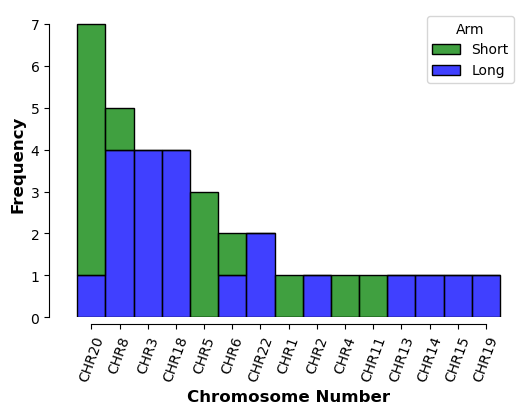

In [4]:
sns.histplot(x="CHR",
             hue="Arm", palette=["g","b"] , multiple="stack",
            data=df1),
sns.despine(offset=5, trim=True)
plt.xticks(rotation=70)
plt.ylabel('Frequency',weight = "bold", fontsize=12)
plt.xlabel('Chromosome Number',weight = "bold", fontsize=12)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.savefig('Fig 1.TIFF', bbox_inches = 'tight', dpi=300)

In [5]:
df1['Locus'] = pd.Categorical(df1["Locus"],["20p12.2","18q12.3","3q28","5p15.33","22q13.1","8q24.21","20q11.22","1p34.2","14q21","6q22.1","15q24","8q24","8q24.3","19q12","2q37.1","8p22","3q26.2","11p15.5","6p22.3","5p15.3","13q34","4p16.3"])

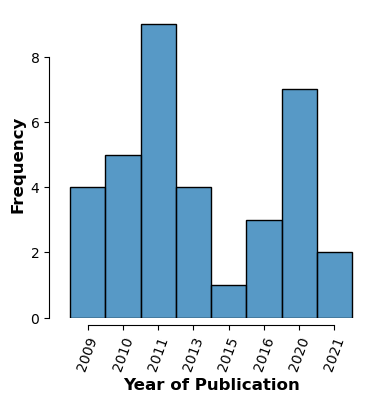

In [6]:
df1['Year']=df1['Year'].apply(str)
df1['Year'] = pd.Categorical(df1["Year"],["2009","2010","2011","2013","2015", "2016","2020","2021"])
sns.histplot(x="Year",
            data=df1),
sns.despine(offset=5, trim=True)
plt.xticks(rotation=70)
plt.ylabel('Frequency',weight = "bold", fontsize=12)
plt.xlabel('Year of Publication',weight = "bold", fontsize=12)
fig = plt.gcf()
fig.set_size_inches(4, 4)
plt.savefig('Fig 4.TIFF', bbox_inches = 'tight', dpi=300)

In [7]:
df1['Locus'] = pd.Categorical(df1["Locus"],["20p12.2","18q12.3","3q28","5p15.33","22q13.1","8q24.21","20q11.22","1p34.2","14q21","6q22.1","15q24","8q24","8q24.3","19q12","2q37.1","8p22","3q26.2","11p15.5","6p22.3","5p15.3","13q34","4p16.3"])

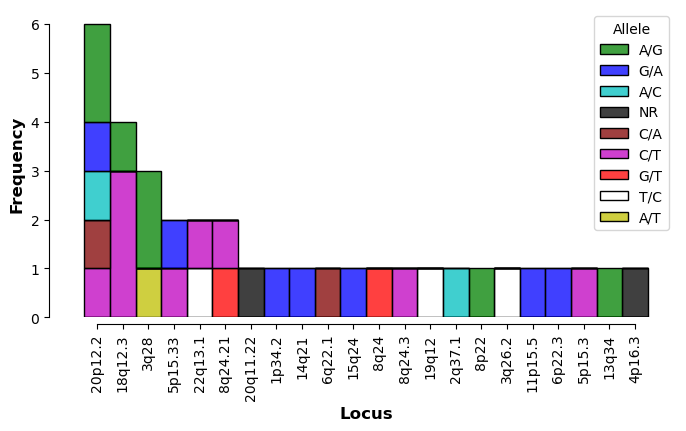

In [8]:
sns.histplot(x="Locus",
            hue="Allele", palette=["g","b","c","k","#800000","m","r","w","y"],multiple="stack",
            data=df1),
sns.despine(offset=5, trim=True)
plt.xticks(rotation=90)
plt.ylabel('Frequency',weight = "bold", fontsize=12)
plt.xlabel('Locus',weight = "bold", fontsize=12)
fig = plt.gcf()
fig.set_size_inches(8, 4)
plt.savefig('Fig 2.TIFF', bbox_inches = 'tight', dpi=300)

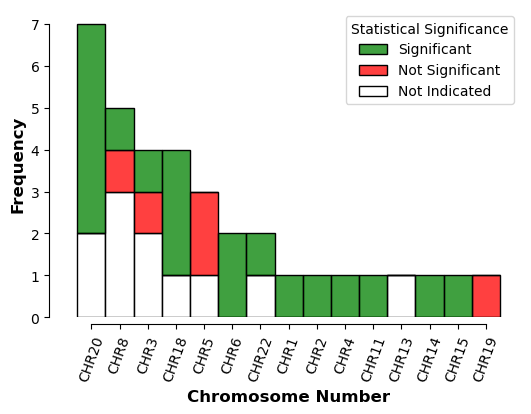

In [9]:
df1['Statistical Significance'] = pd.Categorical(df1["Statistical Significance"],["Significant","Not Significant","Not Indicated"])
sns.histplot(x="CHR",
             hue="Statistical Significance", palette=["g","r","w"] , multiple="stack",
            data=df1),
sns.despine(offset=5, trim=True)
plt.xticks(rotation=70)
plt.ylabel('Frequency',weight = "bold", fontsize=12)
plt.xlabel('Chromosome Number',weight = "bold", fontsize=12)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.savefig('Fig 3.TIFF', bbox_inches = 'tight', dpi=300)

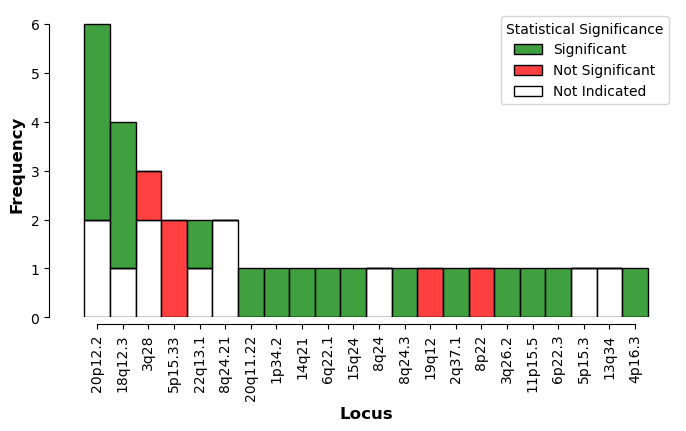

In [10]:
sns.histplot(x="Locus",
            hue="Statistical Significance", palette=["g","r","w"],multiple="stack",
            data=df1),
sns.despine(offset=5, trim=True)
plt.xticks(rotation=90)
plt.ylabel('Frequency',weight = "bold", fontsize=12)
plt.xlabel('Locus',weight = "bold", fontsize=12)
fig = plt.gcf()
fig.set_size_inches(8, 4)
plt.savefig('Fig 5.TIFF', bbox_inches = 'tight', dpi=300)

In [11]:
df1['Genotype(SNPs) '] = pd.Categorical(df1["Genotype(SNPs) "],["rs6104690","rs9642880","rs710521","rs401681","rs1014971","rs6108803","rs62185668","rs602846","rs621559","rs398652","rs654128","rs11543198","rs7238033","rs10775480","rs11082469","rs2736098","rs2294008","rs8102137","rs11892031","rs1495741","rs10936599","rs907611","rs4510656","rs4907479","rs17674580","rs4813953","rs798766"])

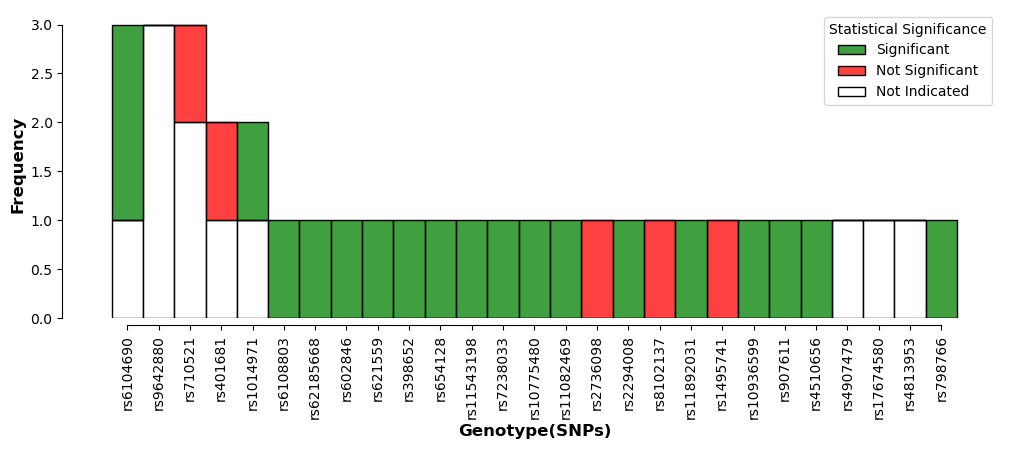

In [12]:
sns.histplot(x="Genotype(SNPs) ",
             hue="Statistical Significance", palette=["g","r","w"],multiple="stack",
            data=df1),
sns.despine(offset=5, trim=True)
plt.xticks(rotation=90)
plt.ylabel('Frequency',weight = "bold", fontsize=12)
plt.xlabel('Genotype(SNPs)',weight = "bold", fontsize=12)
fig = plt.gcf()
fig.set_size_inches(12, 4)
plt.savefig('Fig 6.TIFF', bbox_inches = 'tight', dpi=300)

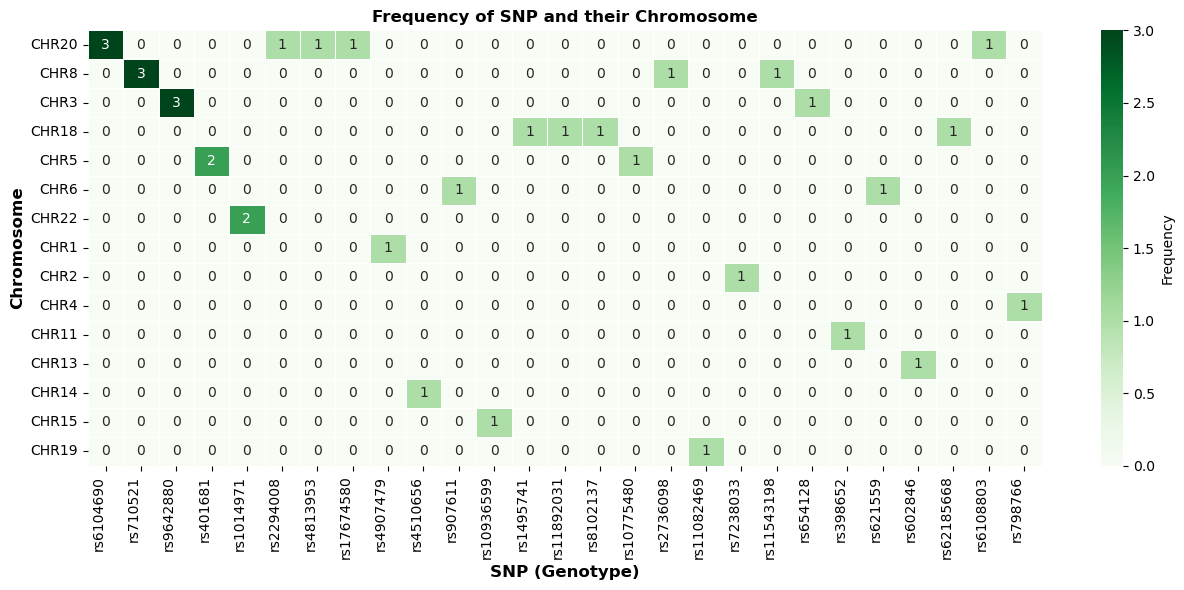

In [13]:
ct = pd.crosstab(df1['CHR'], df1['Genotype(SNPs) '])
snp_order = df1['Genotype(SNPs) '].value_counts().index
plt.figure(figsize=(13, 6))
sns.heatmap(ct, annot=True, fmt='d', cmap='Greens', linewidths=0.5, cbar_kws={'label': 'Frequency'}, xticklabels=snp_order)
plt.title('Frequency of SNP and their Chromosome' ,weight = "bold", fontsize=12)
plt.xlabel('SNP (Genotype)',weight = "bold", fontsize=12)
plt.ylabel('Chromosome',weight = "bold", fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.savefig('Fig 7.TIFF', bbox_inches = 'tight', dpi=300)

In [14]:
df2 = pd.read_csv('df2.csv', encoding='latin-1')

In [15]:
df2 = df2.pivot("Author", "Case-Control", "Number")

C:\Users\user\AppData\Local\Temp\ipykernel_22228\2888474904.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df2 = df2.pivot("Author", "Case-Control", "Number")


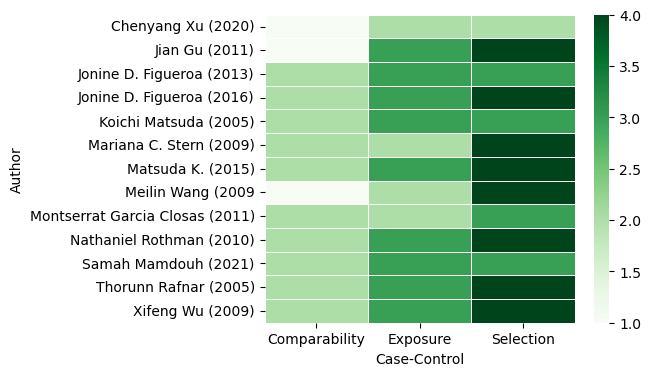

In [17]:
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(df2, annot=False, linewidths=.5, cmap='Greens', ax=ax)
fig = plt.gcf()
plt.savefig('Fig 8.TIFF', bbox_inches = 'tight', dpi=300)

In [18]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\user\.conda\envs\stat\lib\site-packages\geoplot\geoplot.py:248: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  warnings.warn(
C:\Users\user\.conda\envs\stat\lib\site-packages\geoplot\geoplot.py:708: UserWarning: Could not set plot extent successfully due to numerical instability. Try setting extent manually. Defaulting to a global extent.
  warnings.warn(


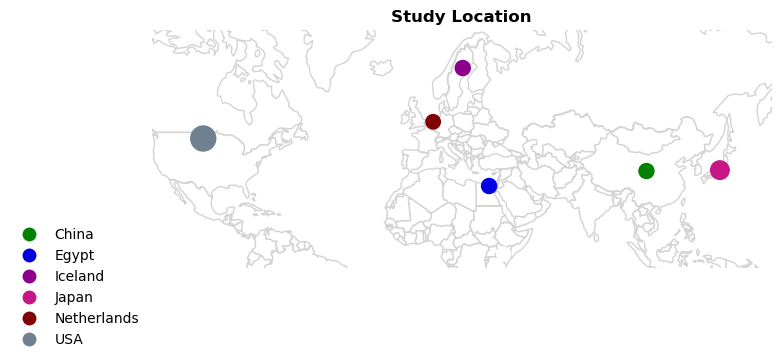

In [19]:
df1_G = pd.read_csv('GPS.csv', encoding='latin-1')
gdf1 = gpd.GeoDataFrame(df1_G, geometry=gpd.points_from_xy(df1_G.Long, df1_G.Lat))

colors = ["#FFFFFF",(0 / 255, 128 / 255, 0 / 255), (0 / 255, 0 / 255, 225 / 255),(139/255, 0/255, 139/255),(199/255 ,21/255 ,133/255),(128/255 ,0/255, 0/255),(112/255, 128/255, 144/255),]
df = pd.read_csv('GPS.csv', encoding='latin-1')
gdf2 = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Long, df.Lat))
cm = LinearSegmentedColormap.from_list('minard', colors)
scheme = mc.Quantiles(gdf2['Number'], k=2)
ax = gplt.pointplot(gdf2,scale='Number',limits=(10, 18), hue =('Region'),
                    legend=True,legend_kwargs={'bbox_to_anchor': (0.00, 0.31), 'frameon': False}, projection=gcrs.WebMercator(),
                   cmap=cm)
gplt.polyplot(world, ax=ax, facecolor='white', edgecolor='lightgray',projection=gcrs.WebMercator())

fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.title('Study Location' ,weight = "bold", fontsize=12)
plt.savefig('Location.TIFF', bbox_inches = 'tight', dpi=300)

C:\Users\user\.conda\envs\stat\lib\site-packages\geoplot\geoplot.py:248: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  warnings.warn(


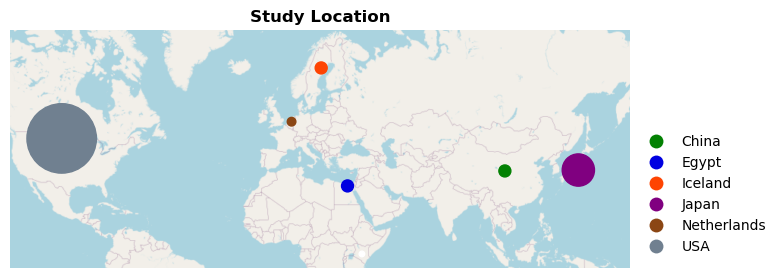

In [20]:
colors = ["#FFFFFF", (0 / 255, 128 / 255, 0 / 255), (0 / 255, 0 / 255, 225 / 255),"#FF4500","#800080","#8B4513",(112/255, 128/255, 144/255)]
cm = LinearSegmentedColormap.from_list('minard', colors)
ax = gplt.webmap(world, projection=gcrs.WebMercator())
gplt.pointplot(
    gdf1, projection=gcrs.AlbersEqualArea(),
    scale='Number', limits=(4, 50), hue='Region', cmap=cm,legend=True,legend_kwargs={'bbox_to_anchor': (1.0, 0.7), 'frameon': False},
    ax=ax
)
fig = plt.gcf()
fig.set_size_inches(8, 7)
plt.title('Study Location' ,weight = "bold", fontsize=12)
plt.savefig('Loc_.png', bbox_inches = 'tight', dpi=300)